In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from sklearn import preprocessing
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection 

%matplotlib inline
plt.style.use('seaborn')

C:\Users\l-pla\AppData\Local\Temp\ipykernel_9988\3415055798.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


#### 1. Загрузка данных

In [3]:
path = r'data\train_data.zip'
data = pd.read_csv(path, compression = 'zip')

In [4]:
data.head(10)

,product_name,period,price,postcode,address_name,lat,lon,object_type,total_square,rooms,floor,city,settlement,district,area,description,source
0,"3-комнатная, 137 м²",NaN,63000000,127473.0,"2-й Щемиловский переулок, 5а",55.778894,37.608844,Квартира,137.0,3.0,6.0,Москва,NaN,Тверской район,NaN,Просторная квартира свободной планировки с пан...,ЦИАН
1,"Студия, 16,7 м²",NaN,3250000,108815.0,"Харлампиева, 46",55.551025,37.313054,Квартира,16.7,NaN,1.0,Москва,NaN,Филимонковское поселение,NaN,ВНИМАНИЕ! ОЧЕНЬ ПРИВЛЕКАТЕЛЬНОЕ ПРЕ...,Домклик
2,"3-комнатная, 76 м²",NaN,16004680,NaN,"ЖК Прокшино, 8 к4",55.594802,37.431264,Квартира,76.0,3.0,6.0,Москва,NaN,Сосенское поселение,NaN,"Apт.1684018. 0,01% - гибкая ипотека! Воспользу...",Яндекс.Недвижимость
3,"1-комнатная, 24 м²",NaN,7841776,NaN,"ЖК Прокшино, 6 к2",55.594332,37.428099,Квартира,24.0,1.0,10.0,Москва,NaN,Сосенское поселение,NaN,Продается однокомнатная квартира № 381 в новос...,Новострой-М
4,"3-комнатная, 126 м²",NaN,120000000,121352.0,"Давыдковская, 18",55.721097,37.464342,Квартира,126.0,3.0,16.0,Москва,NaN,Фили-Давыдково район,NaN,Шикарное предложение!\nПродаётся трёхкомнатная...,Домклик
5,"3-комнатная, 74 м²",NaN,13300000,142721.0,"Пригородное шоссе, 3",55.557342,37.809447,Квартира,74.0,3.0,14.0,NaN,д. Мисайлово,NaN,NaN,Арт. 32494997 \nОтличная 3-х комнатная квартир...,ЦИАН
6,"2-комнатная, 65 м²",NaN,9500000,143986.0,"Автозаводская, 4 к2",55.740408,38.011392,Квартира,65.0,2.0,3.0,Балашиха,NaN,NaN,Железнодорожный м-н,Предлагается к покупке просторная двухкомнатна...,Домклик
7,"3-комнатная, 87 м²",NaN,15000000,143072.0,"Михаила Кутузова, 15",55.659569,37.218370,Квартира,87.0,3.0,11.0,NaN,пос. ВНИИССОК,NaN,NaN,"ЖК Гусарская Баллада, кирпичный дом, огороженн...",ЦИАН
8,"2-комнатная, 35,8 м²",NaN,7135671,NaN,"3-й квартал, к66",55.700571,37.962692,Квартира,35.8,2.0,11.0,Люберцы,NaN,NaN,Самолёт м-н,Продается двухкомнатная квартира № 542 в новос...,Новострой-М
9,"2-комнатная, 68,3 м²",NaN,31500000,127427.0,"улица Академика Королёва, 21",55.820044,37.602498,Квартира,68.3,2.0,4.0,Москва,NaN,Марфино район,NaN,Дом ''Достижение'' располагается в Москве в ок...,ЦИАН


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98822 entries, 0 to 98821
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  98822 non-null  object 
 1   period        0 non-null      float64
 2   price         98822 non-null  int64  
 3   postcode      93675 non-null  float64
 4   address_name  98821 non-null  object 
 5   lat           98822 non-null  float64
 6   lon           98822 non-null  float64
 7   object_type   98822 non-null  object 
 8   total_square  98822 non-null  float64
 9   rooms         94840 non-null  float64
 10  floor         98822 non-null  float64
 11  city          91928 non-null  object 
 12  settlement    6894 non-null   object 
 13  district      75111 non-null  object 
 14  area          19498 non-null  object 
 15  description   98573 non-null  object 
 16  source        98822 non-null  object 
dtypes: float64(7), int64(1), object(9)
memory usage: 12.8+ MB


#### 2. Очистка данных и заполнение пропусков


In [6]:
# Выведем список признаков с прокусками отсортированный по возрастанию количества пропусков 

def series_cols_with_null (df: pd.DataFrame) -> pd.Series:
    cols_null_percent = df.isnull().mean() * 100
    cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
    return cols_with_null

In [7]:
series_cols_with_null(data)

period          100.000000
settlement       93.023821
area             80.269576
district         23.993645
city              6.976179
postcode          5.208354
rooms             4.029467
description       0.251968
address_name      0.001012
dtype: float64

##### 2.1. Заполним пропуски в признаках city и settlement

In [10]:
# Отфильтруем таблицу, чтобы вывести все строки с пропусками в признаке city
data[data.loc[:,'city'].isna()]

,product_name,period,price,postcode,address_name,lat,lon,object_type,total_square,rooms,floor,city,settlement,district,area,description,source
5,"3-комнатная, 74 м²",NaN,13300000,142721.0,"Пригородное шоссе, 3",55.557342,37.809447,Квартира,74.0,3.0,14.0,NaN,д. Мисайлово,NaN,NaN,Арт. 32494997 \nОтличная 3-х комнатная квартир...,ЦИАН
7,"3-комнатная, 87 м²",NaN,15000000,143072.0,"Михаила Кутузова, 15",55.659569,37.218370,Квартира,87.0,3.0,11.0,NaN,пос. ВНИИССОК,NaN,NaN,"ЖК Гусарская Баллада, кирпичный дом, огороженн...",ЦИАН
29,"3-комнатная, 75 м²",NaN,12500000,142720.0,"Южная, 14",55.521080,37.590721,Квартира,75.0,3.0,7.0,NaN,рп. Дрожжино,NaN,Бутово парк 2 м-н,Id 351168. Отличный вариант трехкомнатной квар...,ЦИАН
35,"2-комнатная, 54 м²",NaN,10260000,140060.0,"Ленинградская, 15",55.607467,37.980339,Квартира,54.0,2.0,2.0,NaN,рп. Октябрьский,NaN,NaN,Продам квартиру. Ремонт делали для себя из дор...,Домклик
45,"1-комнатная, 38,5 м²",NaN,8300000,143025.0,"Связистов, 1",55.723832,37.355074,Квартира,38.5,1.0,8.0,NaN,с. Немчиновка,NaN,Микрорайон Немчиновка жилой комплекс,Агенства и перекупщики не беспокойти пожалуйст...,Домклик
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98778,"1-комнатная, 34 м²",NaN,6200000,142714.0,"Ново-Молоковский бульвар, 8",55.562179,37.851657,Квартира,34.0,1.0,7.0,NaN,с. Молоково,NaN,Ново Молоково жилой комплекс,"Вашему вниманию предлагается светлая, уютная 1...",Домклик
98784,"2-комнатная, 59,3 м²",NaN,9600000,142720.0,"Южная, 9",55.521072,37.584782,Квартира,59.3,2.0,4.0,NaN,рп. Дрожжино,NaN,Бутово парк 2 м-н,Продается 2-комнатная квартира в новом доме в ...,Домклик
98805,"2-комнатная, 64,9 м²",NaN,8700000,142029.0,"Творчества, 5 к2",55.473726,37.708870,Квартира,64.9,2.0,13.0,NaN,с. Домодедово,NaN,Домодедово Парк жилой комплекс,Арт. 31095582 Предлагается к продаже двухкомна...,Домклик
98814,"1-комнатная, 40 м²",NaN,6000000,140060.0,"60 лет Победы, 10а",55.606092,37.965460,Квартира,40.0,1.0,10.0,NaN,рп. Октябрьский,NaN,NaN,"Продается просторная, теплая однокомнатная ква...",Домклик


In [12]:
# Отфильтруем таблицу, чтобы вывести все строки с пропусками в признаке settlement	
data[data.loc[:,'settlement'].isna()]

,product_name,period,price,postcode,address_name,lat,lon,object_type,total_square,rooms,floor,city,settlement,district,area,description,source
0,"3-комнатная, 137 м²",NaN,63000000,127473.0,"2-й Щемиловский переулок, 5а",55.778894,37.608844,Квартира,137.0,3.0,6.0,Москва,NaN,Тверской район,NaN,Просторная квартира свободной планировки с пан...,ЦИАН
1,"Студия, 16,7 м²",NaN,3250000,108815.0,"Харлампиева, 46",55.551025,37.313054,Квартира,16.7,NaN,1.0,Москва,NaN,Филимонковское поселение,NaN,ВНИМАНИЕ! ОЧЕНЬ ПРИВЛЕКАТЕЛЬНОЕ ПРЕ...,Домклик
2,"3-комнатная, 76 м²",NaN,16004680,NaN,"ЖК Прокшино, 8 к4",55.594802,37.431264,Квартира,76.0,3.0,6.0,Москва,NaN,Сосенское поселение,NaN,"Apт.1684018. 0,01% - гибкая ипотека! Воспользу...",Яндекс.Недвижимость
3,"1-комнатная, 24 м²",NaN,7841776,NaN,"ЖК Прокшино, 6 к2",55.594332,37.428099,Квартира,24.0,1.0,10.0,Москва,NaN,Сосенское поселение,NaN,Продается однокомнатная квартира № 381 в новос...,Новострой-М
4,"3-комнатная, 126 м²",NaN,120000000,121352.0,"Давыдковская, 18",55.721097,37.464342,Квартира,126.0,3.0,16.0,Москва,NaN,Фили-Давыдково район,NaN,Шикарное предложение!\nПродаётся трёхкомнатная...,Домклик
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98817,"2-комнатная, 42 м²",NaN,12183528,125212.0,"Кронштадтский бульвар, 9 к1/3",55.842935,37.487680,Квартира,42.0,2.0,8.0,Москва,NaN,Головинский район,NaN,Продаётся 2-комн.квартира площадью 42.00 кв.м ...,Яндекс.Недвижимость
98818,"2-комнатная, 63,5 м²",NaN,34925000,129090.0,"Олимпийский проспект, вл10",55.777354,37.621747,Квартира,63.5,2.0,3.0,Москва,NaN,Мещанский район,NaN,С 1 октября повышение цен на 5% на апартаменты...,ЦИАН
98819,"1-комнатная, 34,4 м²",NaN,10000000,117534.0,"Чертановская улица, 53 к1",55.602124,37.591573,Квартира,34.4,1.0,3.0,Москва,NaN,Чертаново Южное район,NaN,Продажа идеальной однокомнатной квартиры. Безу...,Домклик
98820,"3-комнатная, 56 м²",NaN,15999000,109518.0,"1-й Грайвороновский проезд, 3",55.719431,37.724875,Квартира,56.0,3.0,11.0,Москва,NaN,Текстильщики район,NaN,"Новостройка! Евротрешка , две раздельная комна...",Домклик


Возможно, что каждому объекту недвижимости соответствует либо признак city либо settlement. Проверми

In [19]:
# # Множествое объектов, в которых city is np.nan
set_apart_null_city = set(data[data.loc[:,'city'].isna()].index.to_list())

# # Множествое объектов, в которых settlement is np.nan
set_apart_null_settlement = set(data[data.loc[:,'settlement'].isna()].index.to_list())

# Проверим есть ли пересечение множеств
print(f'Множество пересечений {set_apart_null_city.intersection(set_apart_null_settlement)}')

# Проверим, что размер объелинения данных множеств соответствует размерности исходного датасета
print(f'{len(set_apart_null_city.union(set_apart_null_settlement)) == data.shape[0]}')

Множество пересечений set()
True


Следовательно, наше предположение верно.  
Поэтому мы можем оъединить city и settlement в один признак city.  

Для признаков district и area применимы те же рассуждения. Следовательно, мы можем объединим и признаки district и area в один признак district.

In [21]:
data.loc[:,'city'] = data.loc[:,'city'].fillna(data.loc[:,'settlement'])
data.loc[:,'district'] = data.loc[:,'district'].fillna(data.loc[:,'area'])

In [22]:
# Пропуски в данных
series_cols_with_null(data)

period          100.000000
settlement       93.023821
area             80.269576
district          7.561069
postcode          5.208354
rooms             4.029467
description       0.251968
address_name      0.001012
dtype: float64

##### 2.2. Заполним оставшиеся пропуски в признаке district

In [23]:
# Для простоты заполним пропуски в district сответствующими значениями из признака city
data.loc[:,'district'] = data.loc[:,'district'].fillna(data.loc[:,'city'])

In [26]:
# Пропуски в данных
series_cols_with_null(data)

period          100.000000
settlement       93.023821
area             80.269576
postcode          5.208354
rooms             4.029467
description       0.251968
address_name      0.001012
dtype: float64

##### 2.3. Заполним пропуски в признаке rooms 

In [27]:
# Отфильтруем таблицу, чтобы вывести все строки с пропусками в признаке rooms
data[data.loc[:,'rooms'].isna()]

,product_name,period,price,postcode,address_name,lat,lon,object_type,total_square,rooms,floor,city,settlement,district,area,description,source
1,"Студия, 16,7 м²",NaN,3250000,108815.0,"Харлампиева, 46",55.551025,37.313054,Квартира,16.70,NaN,1.0,Москва,NaN,Филимонковское поселение,NaN,ВНИМАНИЕ! ОЧЕНЬ ПРИВЛЕКАТЕЛЬНОЕ ПРЕ...,Домклик
52,"Квартира, 40,5 м²",NaN,30142700,107078.0,"проспект Академика Сахарова, 11 стр",55.771159,37.643736,Квартира,40.46,NaN,9.0,Москва,NaN,Красносельский район,NaN,"Продаются апартаменты-студия площадью 40,46 кв...",ЦИАН
101,"Студия, 39,8 м²",NaN,7000000,143402.0,"Жуковского, 11",55.815079,37.325758,Квартира,39.80,NaN,10.0,Красногорск,NaN,СГШ м-н,СГШ м-н,Арт. 28312303 Продается замечательная и просто...,Домклик
106,"Студия, 19,9 м²",NaN,5200000,143421.0,"Заповедная улица, 10",55.774497,37.235877,Квартира,19.90,NaN,5.0,пос. Ильинское-Усово,пос. Ильинское-Усово,пос. Ильинское-Усово,NaN,"Студия , отделка от застройщика. Заповедная до...",Домклик
128,"Студия, 19,8 м²",NaN,4700000,125476.0,"улица Василия Петушкова, 9",55.837418,37.403679,Квартира,19.80,NaN,1.0,Москва,NaN,Южное Тушино район,NaN,На Северо-западе Москвы в экологически чис...,Домклик
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98707,"Студия, 28,4 м²",NaN,5550000,108815.0,"Жемчужная, 1 к16",55.551251,37.341194,Квартира,28.40,NaN,1.0,пос. Марьино,пос. Марьино,Филимонковское поселение,NaN,МОСКОВСКАЯ ПРОПИСКА!\nПродаётся теплая квартир...,Домклик
98716,"Квартира, 78,2 м²",NaN,35000000,119192.0,"Мичуринский проспект, 56",55.695901,37.485901,Квартира,78.20,NaN,45.0,Москва,NaN,Раменки район,NaN,Продаётся квартира с потрясающими видовыми хар...,ЦИАН
98762,"Студия, 100,1 м²",NaN,77500000,125047.0,"2-я Брестская улица, 6",55.770896,37.591538,Квартира,100.10,NaN,10.0,Москва,NaN,Тверской район,NaN,Предлагается квартира студия в новом жилом ком...,Домклик
98791,"Студия, 170 м²",NaN,95000000,127051.0,"Садовая-Сухаревская улица, 10/12",55.772778,37.627077,Квартира,170.00,NaN,4.0,Москва,NaN,Мещанский район,NaN,Номер лота: 32292. Предлагается просторная дву...,Домклик


Предположение, что пропущенные строки в признаке rooms принадлежат только квартирам-студиям не подтвердилось. 
Посмотрим распределение пропущенных строк признака rooms относительно признака product_name

In [28]:
def relationship_product_name_for_null_rooms(row: str) -> str:
    if 'дия' in row:
        return 'Студия'
    elif 'ира' in row:
        return 'Квартира'

In [29]:
relationship = data[data.loc[:,'rooms'].isna()].loc[:,'product_name'].apply(relationship_product_name_for_null_rooms)
relationship.value_counts()

Студия      3330
Квартира     652
Name: product_name, dtype: int64

Cтудий намного больше, чем просто квартир.  
Снова для простоты будем считать, что студия - это 1 комната, поэтому заменим все пропуски в столбце rooms на 1.0

In [30]:
data.loc[:,'rooms'] = data.loc[:,'rooms'].fillna(1.0)

In [31]:
# Пропуски в данных
series_cols_with_null(data)

period          100.000000
settlement       93.023821
area             80.269576
postcode          5.208354
description       0.251968
address_name      0.001012
dtype: float64

##### 2.4. Обработка признака postcode        

In [32]:
# Количество уникальных значений в признаке postcode и district
print(data.loc[:,'postcode'].nunique())
print(data.loc[:,'district'].nunique())

657
397


Обычно индекс привязан к какому-то небольшому району города или к целому поселку.  
Видим, что число уникальных индексов больше, чем число районов. 
Поэтому хотелось бы заполнить пропуски и закодировать индексы. 

In [33]:
# Для этого воспользуемся сервисом DaData и проведем обратное геокодирование. 
# Т е по координатам определим почтовый индекс дома.

# from dadata import Dadata
# token = "c222d559ea7785b09de4e2e39cbe56f2c5e2c3e5"
# dadata = Dadata(token)

# def reverse_geocoding_postcode (coordinates: pd.Series) -> int:
#     result = dadata.geolocate(name="address", lat=coordinates.iloc[0], lon=coordinates.iloc[1])
#     if len(result)!= 0:
#         if result[0]['data']['postal_code'] != None:
#             return result[0]['data']['postal_code']
#         else: 
#             return np.nan
#     else: 
#         return np.nan

In [34]:
# postalcode_none_df = data[data.loc[:,'postcode'].isna()]
# postalcode_none_df.shape

(5147, 17)

In [35]:
# Заполним np.nan в признаке postcode данными, полученными из сервиса DaData
# postalcode_none_df.loc[:,'postcode']  = postalcode_none_df.loc[:,['lat','lon']].apply(reverse_geocoding_postcode, axis = 1)

C:\Users\l-pla\AppData\Local\Temp\ipykernel_9988\3763407452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postalcode_none_df.loc[:,'postcode']  = postalcode_none_df.loc[:,['lat','lon']].apply(reverse_geocoding_postcode, axis = 1)


In [36]:
# Количество np.nan после заполнения
# postalcode_none_df.loc[:,'postcode'].isna().sum()

1646

К сожалению, не все индексы были определены. Желательно выбрать сервис помощнее (платный).  
В качестве бейзлайна оставшиеся данные заполним предыдущими или последующими значениями.

In [37]:
# postalcode_none_df.loc[:,'postcode'] = postalcode_none_df.loc[:,'postcode'].fillna(method = 'ffill')
# postalcode_none_df.loc[:,'postcode'] = postalcode_none_df.loc[:,'postcode'].fillna(method = 'bfill')
# postalcode_none_df.loc[:,'postcode'].isna().sum()

C:\Users\l-pla\AppData\Local\Temp\ipykernel_9988\900698504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postalcode_none_df.loc[:,'postcode'] = postalcode_none_df.loc[:,'postcode'].fillna(method = 'ffill')
C:\Users\l-pla\AppData\Local\Temp\ipykernel_9988\900698504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postalcode_none_df.loc[:,'postcode'] = postalcode_none_df.loc[:,'postcode'].fillna(method = 'bfill')


0

Заполним пропуски в исходном датафрейме

In [38]:
# data.loc[:,'postcode'] = data.loc[:,'postcode'].fillna(postalcode_none_df.loc[:,'postcode'])

In [39]:
# Пропуски в данных
# series_cols_with_null(data)

period          100.000000
settlement       93.023821
area             80.269576
description       0.251968
address_name      0.001012
dtype: float64

Сохраним фрейм и загрузим его с пк. Это сделано потому после 10к обращений в день сервер перестает отвечать.  
Предыдущую функцию закомментим. 

In [46]:
# Сохраним датафрейм
# data.to_csv(r'data\data_with_dadata.csv', index = False)

In [51]:
# Загрузим даафрейм в переменную data
data = pd.read_csv(r'data\data_with_dadata.csv')

При помощи dadata можно было заполнить все пропуски в данных, так как пропусков в координатах нет. Однако, в бесплатной версии количество запросов в сутки ограничего 10к запросами, поэтому заполнил только часть.

##### 2.5. Обработка признака description 

In [55]:
data.loc[:,'description'][0]

'Просторная квартира свободной планировки с панорамным остеклением: 5 окон от пола до потолка, 3 балкона, из каждого окна можно выйти на балкон. Окна квартиры выходят во внутренний двор, что обеспечивает достаточную тишину даже с открытыми окнами. В ЖК Махаон имеется трехуровневый подземный паркинг на 120 машиномест, собственная закрытая и круглосуточно охраняемая территория. В наличии есть 1 машиноместо. На первых трех этажах находятся: фитнесс центр с бассейном, салон красоты, детский сад. Прилегающая территория озеленена, во дворе детская площадка. 5 минут до метро Новослободская пешком.'

Посмотрев на значения ячеек признака description, мне на беглый взгляД не удалось выявить какие-либо закономерности в описании. Можно попытаться поработать с данным признаком как с текстом и применить различные обработчики текста, но думаю, это тупиковый путь по крайне мере для бейзлайна.

##### 2.6. Обработка пропуска address_name

In [56]:
# Количество пропусков в признаке address_name
data.loc[:,'address_name'].isna().sum()

1

In [59]:
# В признаке address_name всего один пропуск. Заполним его предыдущим значением
data.loc[:,'address_name'] = data.loc[:,'address_name'].fillna(method = 'bfill')

# Количество пропусков в признаке address_name
data.loc[:,'address_name'].isna().sum()

0

##### 2.7. Обработка признака product_name

In [60]:
# Создадим новый признак apart_type и заполнием его типом объекта недвижимости из признака product_name
data['apart_type'] = data.loc[:,'product_name'].apply(lambda x: x.split()[0].replace(',',''))

##### 2.8. Обработка признака object_type

In [61]:
# Посмотрим количество уникальных значений признака object_type
data.loc[:,'object_type'].nunique()

1

##### 2.9. Обработка признаков lat и lon

In [62]:
# Сами по себе признаки lat и lon неинформативны. Но при помощи данных признаков посчитаем расттояние от центра Москвы
# до интересующего нас объекта недвижимости.

def distance_from_the_center(cols: pd.Series) -> float:
    R = 6372795 # Earth radius on meter
    lat_center_msk = 55.751999
    lon_center_msk = 37.617734
    d_lat = np.radians(cols[0])-np.radians(lat_center_msk)
    d_lon = np.radians(cols[1])-np.radians(lon_center_msk)
    return 2*R*np.arcsin(np.sqrt((np.sin(d_lat/2))**2 + np.cos(np.radians(cols[0]))*
                                 np.cos(np.radians(lat_center_msk))*np.sin(d_lon/2)**2))

In [63]:
data['distance_from_the_center'] = data.loc[:,['lat','lon']].apply(distance_from_the_center, axis = 1)

#### 3. Кодирование фичей и изменение типов данных

##### 3.1. Изменение типов данных

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98822 entries, 0 to 98821
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_name              98822 non-null  object 
 1   period                    0 non-null      float64
 2   price                     98822 non-null  int64  
 3   postcode                  98822 non-null  float64
 4   address_name              98822 non-null  object 
 5   lat                       98822 non-null  float64
 6   lon                       98822 non-null  float64
 7   object_type               98822 non-null  object 
 8   total_square              98822 non-null  float64
 9   rooms                     98822 non-null  float64
 10  floor                     98822 non-null  float64
 11  city                      98822 non-null  object 
 12  settlement                6894 non-null   object 
 13  district                  98822 non-null  object 
 14  area  

In [65]:
data.columns.to_list()

['product_name',
 'period',
 'price',
 'postcode',
 'address_name',
 'lat',
 'lon',
 'object_type',
 'total_square',
 'rooms',
 'floor',
 'city',
 'settlement',
 'district',
 'area',
 'description',
 'source',
 'apart_type',
 'distance_from_the_center']

In [66]:
data.loc[:,'total_square'] = data.loc[:,'total_square'].astype('int')
data.loc[:,'rooms'] = data.loc[:,'rooms'].astype('int')
data.loc[:,'floor'] = data.loc[:,'floor'].astype('int')
data.loc[:,'distance_from_the_center'] = data.loc[:,'distance_from_the_center'].astype('int')

C:\Users\l-pla\AppData\Local\Temp\ipykernel_9988\298162893.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'total_square'] = data.loc[:,'total_square'].astype('int')
C:\Users\l-pla\AppData\Local\Temp\ipykernel_9988\298162893.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'rooms'] = data.loc[:,'rooms'].astype('int')
C:\Users\l-pla\AppData\Local\Temp\ipykernel_9988\298162893.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98822 entries, 0 to 98821
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_name              98822 non-null  object 
 1   period                    0 non-null      float64
 2   price                     98822 non-null  int64  
 3   postcode                  98822 non-null  float64
 4   address_name              98822 non-null  object 
 5   lat                       98822 non-null  float64
 6   lon                       98822 non-null  float64
 7   object_type               98822 non-null  object 
 8   total_square              98822 non-null  int32  
 9   rooms                     98822 non-null  int32  
 10  floor                     98822 non-null  int32  
 11  city                      98822 non-null  object 
 12  settlement                6894 non-null   object 
 13  district                  98822 non-null  object 
 14  area  

##### 3.2. Кодирование данных 

In [69]:
# Выберем категориальные фичи для кодирования
cat_features_list = ['postcode', 'address_name', 'city', 'district', 'source', 'apart_type']

# Выберем числовые фичи
nums_features_list = ['total_square', 'rooms', 'floor', 'distance_from_the_center']

In [70]:
# Закодируем все категориальные фичи Бинарным кодированием
bin_encoder = ce.BinaryEncoder(cols=cat_features_list) 
type_bin = bin_encoder.fit_transform(data[cat_features_list])
data = pd.concat([data, type_bin], axis=1)

#### 4. Отбор признаков

##### 4.1. Удаление признаков

In [71]:
# Удалим признаки, которые стали неинформативными в ходе обработки признаков. 
# А также закодированные категориальные признаки
data.drop(columns = ['settlement', 'area', 'period', 'description', 'product_name', 
                    'object_type', 'lat', 'lon'], axis = 1, inplace = True)
data.drop(columns = cat_features_list, axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98822 entries, 0 to 98821
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   price                     98822 non-null  int64
 1   total_square              98822 non-null  int32
 2   rooms                     98822 non-null  int32
 3   floor                     98822 non-null  int32
 4   distance_from_the_center  98822 non-null  int32
 5   postcode_0                98822 non-null  int64
 6   postcode_1                98822 non-null  int64
 7   postcode_2                98822 non-null  int64
 8   postcode_3                98822 non-null  int64
 9   postcode_4                98822 non-null  int64
 10  postcode_5                98822 non-null  int64
 11  postcode_6                98822 non-null  int64
 12  postcode_7                98822 non-null  int64
 13  postcode_8                98822 non-null  int64
 14  postcode_9                98822 non-nu

##### 4.2. Мультиколлинеарность

<Axes: >

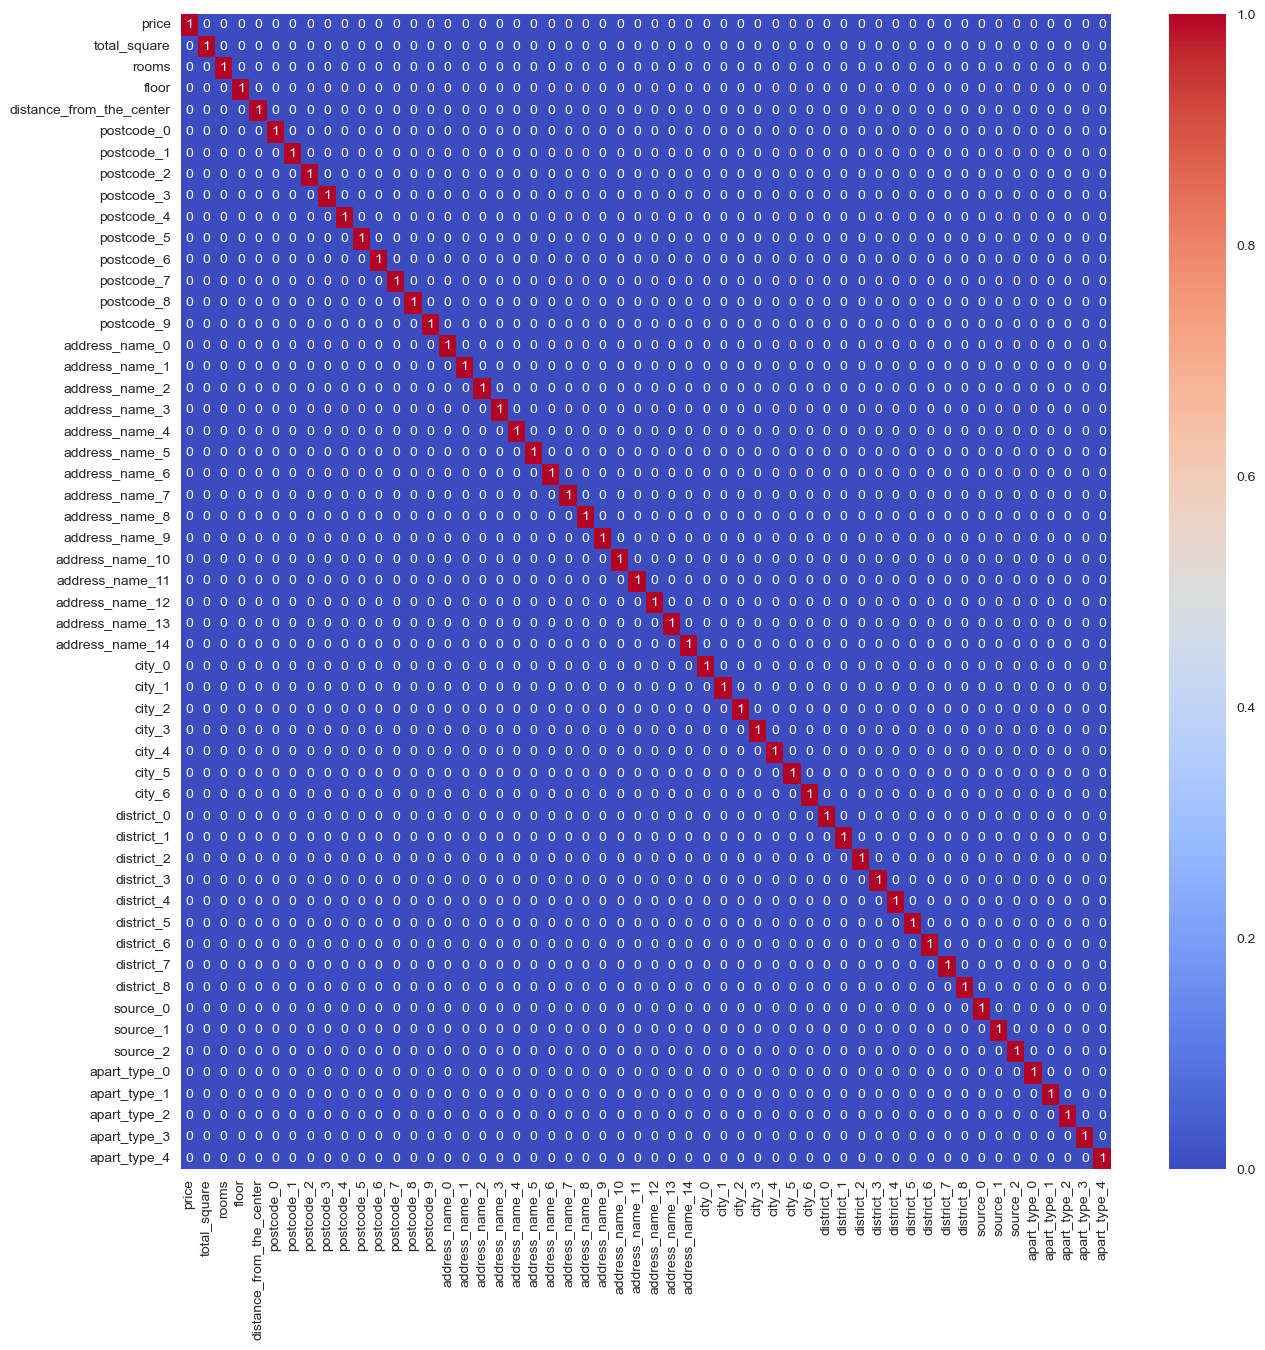

In [72]:
# Изобразим heatmap мультиколлинеарности признаков
plt.rcParams['figure.figsize'] = (15,15)
sns.heatmap(data.corr() > 0.9, annot=True, cmap='coolwarm')

Мультикоррелированных признаков нет

##### 4.3. Оценим важность признаков 

<Axes: >

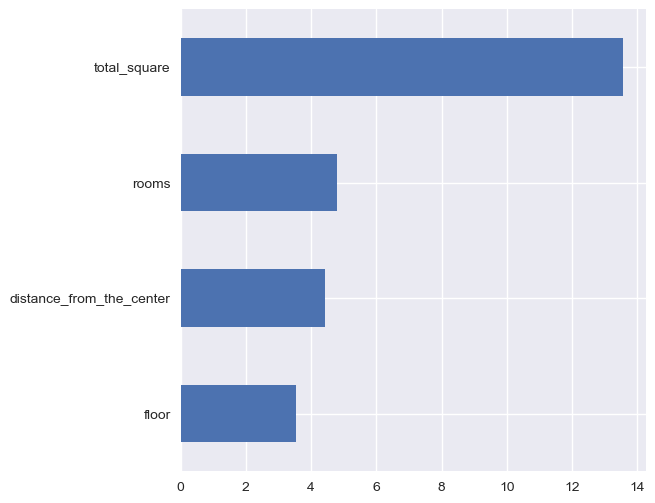

In [73]:
# Оценим значимость числовых признаков, используя тест ANOVA
from sklearn.feature_selection import f_classif

plt.rcParams['figure.figsize'] = (6,6)
importance_num = pd.Series(f_classif(data[nums_features_list], data.loc[:,'price'])[0], index = nums_features_list)
importance_num.sort_values(inplace = True)
importance_num.plot(kind = 'barh')

Предсказуемая картина

<Axes: >

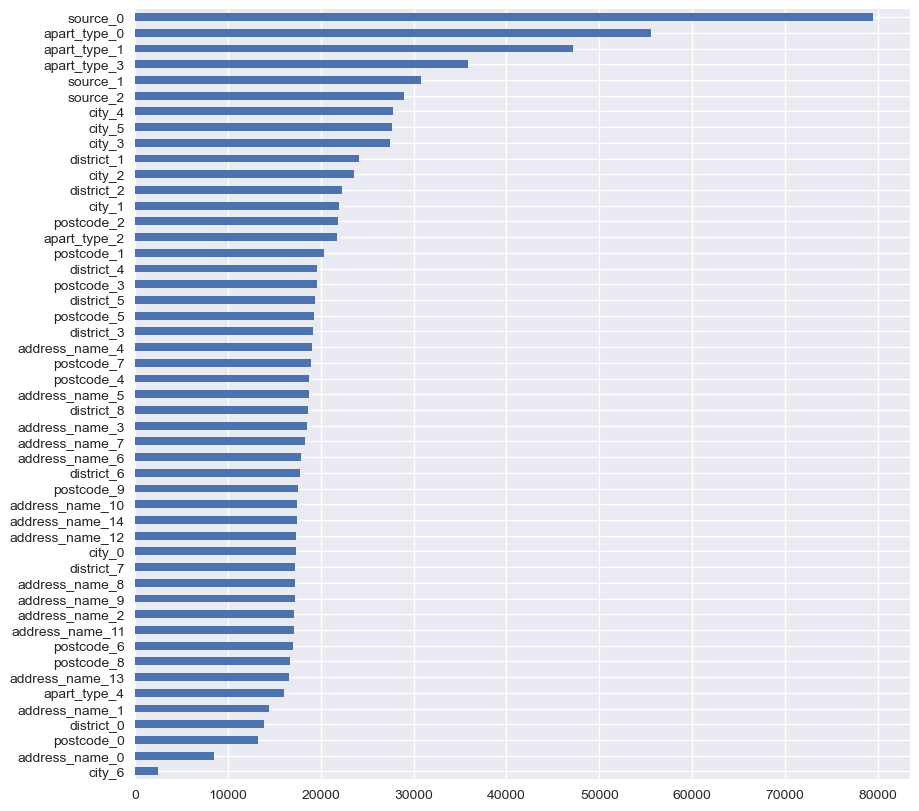

In [77]:
# Оценим значимость категориальных признаков, используя тест Хи-квадрат
from sklearn.feature_selection import chi2 

cat_features_list = data.columns.to_list()[5:]

plt.rcParams['figure.figsize'] = (10,10)
importance_cat = pd.Series(chi2(data[cat_features_list], data.loc[:,'price'])[0], index=cat_features_list)
importance_cat.sort_values(inplace = True)
importance_cat.plot(kind = 'barh')

На первой итерации оставим все признаки

#### 5. Пострение модели

Предположения:  
Думаю, для решения данной задачи лучше всего подходит RandomForest.  
Поэтому чтобы не тратить время на обучение заведомо плохих (линейная регрессия) и тяжелых моделей будет обучать только RandomForest.

##### 5.1. Подготовка данных для модели

In [78]:
X = data.drop(['price'], axis=1)
y = data['price']

In [79]:
# Разделяем тренинговый датасет: 75% на обучение, 25% на валидацию
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Проверяем размерности получившихся датасетов
X.shape, X_train.shape, X_test.shape

((98822, 53), (74116, 53), (24706, 53))

##### 5.2. Построение и оценка модели RandomForestRegressor

In [ ]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=42)

# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train) 

# Предсказаваем значения и записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [85]:
# Рассчитаем метрику MAPE
print(f'MAPE: {round(metrics.mean_absolute_percentage_error(y_test, y_pred),4)}')

# Рассчитаем метрику MAE
print(f'MAE: {round(metrics.mean_absolute_error(y_test, y_pred),0)}')

MAPE: 0.096
MAE: 2879159.0


<Axes: >

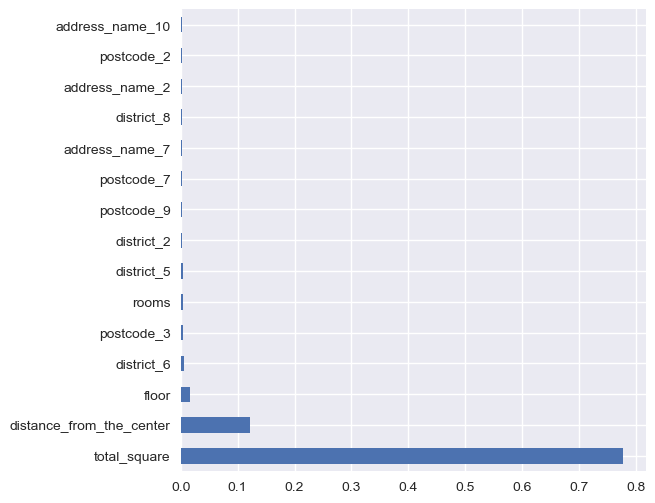

In [89]:
# Выведем самые важные признаки для модели
plt.rcParams['figure.figsize'] = (6,6)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

Видим, что созданный нами признак distance_from_the_center оказался одним из самых ценных для модели (успех).  
Однако остальные не очень важные в сравнении. 


Судя по данной гистограмме можно было обучить линейную регрессию на признаках total_square, distance_from_the_center, floor и rooms и получить неплоой результат.

##### 5.3 Построение модели случайного леса с кросс валидацией и ее оценка

In [90]:
#Создаём объект кросс-валидатора k-fold
cv = model_selection.StratifiedKFold(n_splits=5)

In [91]:
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=regr,
    X=X, 
    y=y, 
    cv=cv,
    scoring='neg_mean_absolute_percentage_error',
    return_train_score=True 
)

c:\Users\l-pla\anaconda3\envs\LI\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 1

In [97]:
train_k_fold_mape = abs(np.mean(cv_metrics['train_score']))
valid_k_fold_mape = abs(np.mean(cv_metrics['test_score']))

print(f'Train k-fold mape: {round(train_k_fold_mape,4)}')
print(f'Valid k-fold mape: {round(valid_k_fold_mape,4)}')

Train k-fold mape: 0.0362
Valid k-fold mape: 0.0943


#### 6. Сохранение модели

In [99]:
# Сохраним модель
import joblib

joblib.dump(regr, r"model\test_GPB_random_forest.joblib")

['model\\test_GPB_random_forest.joblib']

#### 7. Выводы и предложения по улучшению моделей

1. Предложенная модель ошибается в предсказании цены на квартиру в среднем на 9.6 % или на 2.8 млн рублей для новых данных.
2. В данной работе я больше времени уделял EDA, чем настройке модели. 
3. В качестве дальнейшего пути улучшения модели можно перебрать различные гиперпараметры, в том числе при помощи optuna. 
4. Также можно использовать более сильные модели, так как RandomForest для предсказаний почти не использовал (использовал в меньшей степени, чем числовые) категориальные фичи. Например, CatBoost так же с подбором гиперпараметров.